# **Projet portant sur les réseaux de neurones**
### **Réalisé par Fréjoux Gaëtan et Niord Mathieu**
---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Développement d'un perceptron
α sera égal à 0.1

### 1.1. Mise en place d'un perceptron simple

* *Créez la fonction `perceptron_simple(x, w, active)`*

In [3]:
ALPHA = 0.1  # learning rate

def perceptron_simple(x, w, active):
  seuil = w[0]
  dot = np.dot(x, w[1:])
  x = seuil + dot
  return np.sign(x) if (active == 0) else np.tanh(x)


def plot_with_class(X, weight, c, title, min_y, max_y):
    x = np.linspace(min_y, max_y)
    y = (weight[0] + x*weight[1]) / (-weight[2])
    
    plt.plot(x, y)
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=c)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.xlim(min_y, max_y)
    plt.ylim(min_y, max_y)
    
    return plt

**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisée pour développer le perceptron simple**

Nous avons utilisé la fonction `np.dot` pour calculer le produit scalaire entre les vecteurs `x` et `w`. Ensuite nous avons ajouté le seuil à ce produit scalaire. Enfin nous avons utilisé la valeur de `active` pour obtenir la sortie du perceptron avec différentes fonctions d'activation (ici `np.tanh` et `np.sign`).

* *Testez votre perceptron avec l'exemple du OU logique vu en cours (en utilisant la fonction `sign(x)` comme fonction d'activation)*

**Montrez que votre code fonctionne dans le cas du OU**

In [4]:
W_OR = np.array([-0.5, 1, 1])
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

Result_OR = perceptron_simple(X, W_OR, 0) # TODO: fix this pcq j'ai pas compris son truc avec sign(x)
print(Result_OR)

[-1.  1.  1.  1.]


Le vecteur retourné par notre perceptron semble correspondre à la sortie attendue (OU logique). Effectivement, nous notons l'exclusion d'un unique élément que nous pourrions symboliser par un `false` (ici -1) quand les trois autres éléments vaudraient un `true` (ici 1).

* *Affichez dans le cadre de l'exemple du OU logique sur la même figure les différents éléments de l'ensemble d'apprentissage et la droite séparatrice associée aux poids du neurone sur la même figure*

**Affichez la figure individu/frontière et commentez**

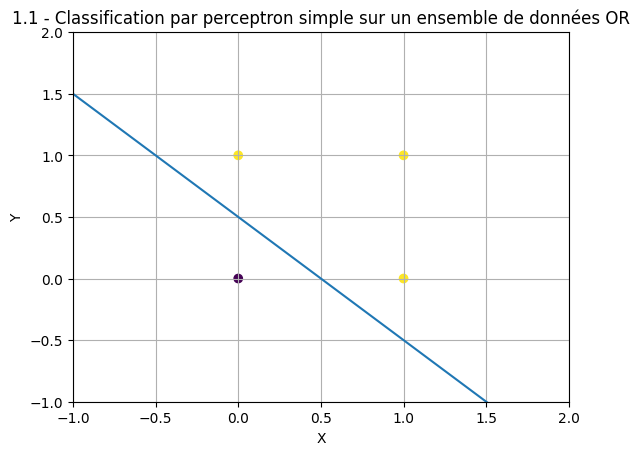

In [5]:
plot_with_class(
    X, W_OR, Result_OR,
    "1.1 - Classification par perceptron simple sur un ensemble de données OR",
    -1, 2
).show()

Comme nous pouvons le voir ci-dessus, le perceptron a bel et bien était capable de séparer les points en deux groupes distincts illustrant le OU logique : trois points jaune au-dessus de la droite (car leurs sorties valaient 1), le dernier point se situant en-dessous de la séparation et se retrouvant alors exclu de ces derniers (car sa sortie valait -1). Ce résultat nous est retourné de par les coordonnées des quatre points ainsi que par les poids de nos tableaux respectifs `X` et `W` fixés plus tôt. Puisque le paramètre `active` vaut 0, la fonction d'activation utilisée est ici `np.sign`, appliquée à la somme pondérée des entrées.

### 1.2. Etude de l'apprentissage

#### 1.2.1. Programmation apprentissage Widrow-Hoff

* *Créez la fonction `apprentissage_widrow(x, yd, epoch, batch_size)`. La droite séparatrice et les points d'apprentissage doivent être affichés à chaque itération (une itération correspond à la présentation de tous les individus de l'ensemble d'apprentissage), ains que l'erreur de classification*

**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisée pour développer l’apprentissage Widrow**

In [6]:
def apprentissage_widrow(x, yd, epoch, batch_size):

    w = np.random.randn(3)
    errors = []
    step = epoch // 10

    for i in range(epoch):

        w_temp = w
        errors.append(0)
        
        for j in range(len(x)):

            y = perceptron_simple(x[j], w, 1)  # with tanh
            r = - (yd[j] - y) * (1 - y * y)

            w_temp += ALPHA * r * np.array([1, x[j][0], x[j][1]])

            errors[i] += r**2

            if (j % batch_size) == 0: w = w_temp

        print("Epoch ", i + 1, " : ", errors[i]) # Errr value display
        
        #allow to show only 10 plots at max
        if (i % step == 0):
            plot_with_class(x, w, yd, "Epoch " + str(i + 1), -1, 2).show()

        if (errors[i] == 0 or (i != 0 and (errors[i - 1] - errors[i] == 0))): break

    return w, errors

Il est tout d'abord important de préciser que nos poids ont été initialisés aléatoirement à l'aide de la fonction `randn()` de `np.random`. À l'intérieur de notre fonction, nous avons bouclé sur `epoch` itérations et pour chaque itération, il a fallu calculer la sortie du perceptron pour chacun des individus afin de pouvoir rééquilibré nos poids en fonction de l'erreur de classification. Nous avons réexploité notre précédente fonction `perceptron_simple()` en fixant le paramètre `active` à 0 pour fixer la valeur de retour à `np.tanh()`.

De manière à pouvoir suivre l'évolution de l'apprentissage, nous avons affiché la droite séparatrice toutes les `epoch/10` étapes (soit les 10% de palier itératif), ainsi que l'erreur de classification à chacune des itérations.

#### 1.2.2. Test 1 simple

* *Chargez les données p2_d1.txt*

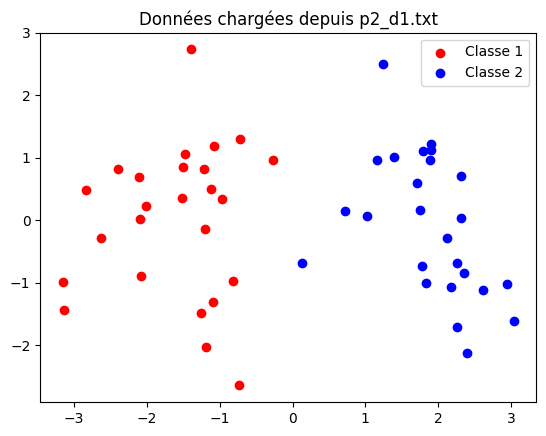

In [7]:
Data1 = np.loadtxt("res/p2_d1.txt")
CLASSIF = [1]*25 + [-1]*25
plt.title("Données chargées depuis p2_d1.txt")
plt.scatter(Data1[0, :25], Data1[1, :25], c='r')
plt.scatter(Data1[0, 25:], Data1[1, 25:], c='b')
plt.legend(['Classe 1', 'Classe 2'])

* *Appliquez l'algorithme d'apprentissage sur les données. Affichez l'évolution de l'erreur. Vérifiez que la frontière est correcte*

Epoch  1  :  7.307979972273356


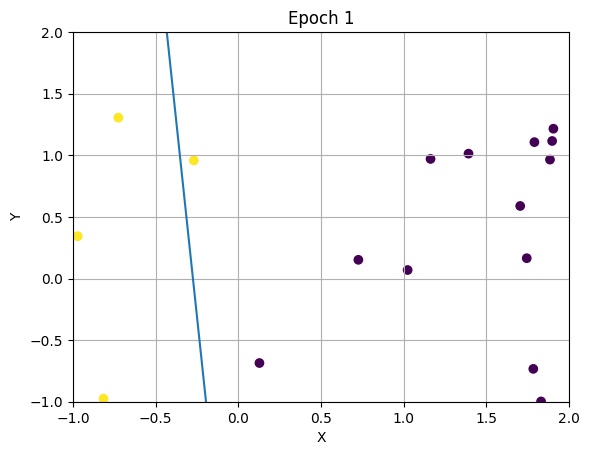

Epoch  2  :  4.768477745085993
Epoch  3  :  3.1072705188113225
Epoch  4  :  2.6641719453289494
Epoch  5  :  2.4228845919301256
Epoch  6  :  2.2714562611043374
Epoch  7  :  2.1642859716040728
Epoch  8  :  2.0782452115359553
Epoch  9  :  2.00130287881954
Epoch  10  :  1.927447301144684
Epoch  11  :  1.8540041232453774
Epoch  12  :  1.7801196970363429
Epoch  13  :  1.7058794536556308
Epoch  14  :  1.631795633746857
Epoch  15  :  1.558517260119652
Epoch  16  :  1.4866750563371816
Epoch  17  :  1.416807387540588
Epoch  18  :  1.3493333702523007
Epoch  19  :  1.2845519628716895
Epoch  20  :  1.2226540275677202
Epoch  21  :  1.1637396484750626
Epoch  22  :  1.1078363708671042
Epoch  23  :  1.0549161273172405
Epoch  24  :  1.0049098747450749
Epoch  25  :  0.9577196808298314
Epoch  26  :  0.91322837392999
Epoch  27  :  0.871307043055176
Epoch  28  :  0.8318207309086241
Epoch  29  :  0.7946326578261665
Epoch  30  :  0.7596072800189704
Epoch  31  :  0.7266124403816822
Epoch  32  :  0.695520824158

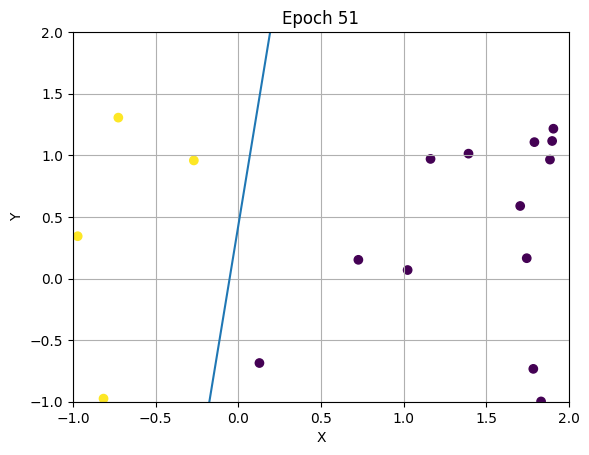

Epoch  52  :  0.33054538590406657
Epoch  53  :  0.32027529052929454
Epoch  54  :  0.310463143053007
Epoch  55  :  0.3010829729291525
Epoch  56  :  0.292110553570816
Epoch  57  :  0.283523270992092
Epoch  58  :  0.275300002950931
Epoch  59  :  0.26742100777565286
Epoch  60  :  0.2598678221057219
Epoch  61  :  0.2526231668272805
Epoch  62  :  0.24567086053408566
Epoch  63  :  0.23899573989374864
Epoch  64  :  0.2325835863466479
Epoch  65  :  0.22642105861016637
Epoch  66  :  0.22049563050357596
Epoch  67  :  0.21479553364887471
Epoch  68  :  0.2093097046400927
Epoch  69  :  0.20402773630805288
Epoch  70  :  0.19893983273939583
Epoch  71  :  0.1940367677379658
Epoch  72  :  0.1893098464435241
Epoch  73  :  0.1847508698473983
Epoch  74  :  0.1803521019671927
Epoch  75  :  0.17610623946329027
Epoch  76  :  0.17200638349863961
Epoch  77  :  0.16804601366048724
Epoch  78  :  0.16421896377831555
Epoch  79  :  0.16051939948649951
Epoch  80  :  0.15694179739315603
Epoch  81  :  0.153480925728480

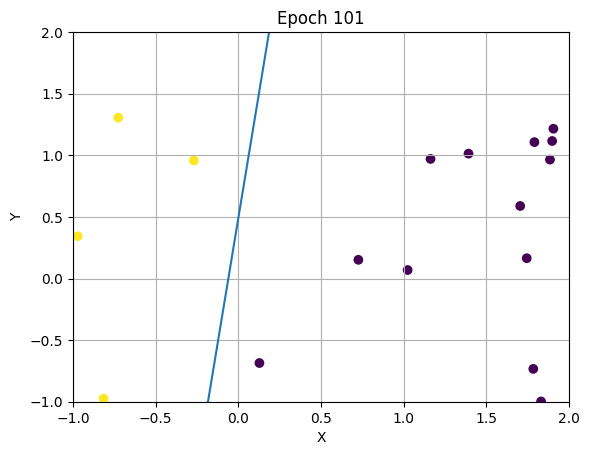

Epoch  102  :  0.10082842286134805
Epoch  103  :  0.09902751278372796
Epoch  104  :  0.09727401322573563
Epoch  105  :  0.09556628784101268
Epoch  106  :  0.09390276971227328
Epoch  107  :  0.0922819578752826
Epoch  108  :  0.09070241404240487
Epoch  109  :  0.08916275951285167
Epoch  110  :  0.08766167225768866
Epoch  111  :  0.08619788416849815
Epoch  112  :  0.08477017845937104
Epoch  113  :  0.08337738721262686
Epoch  114  :  0.08201838905932327
Epoch  115  :  0.08069210698623204
Epoch  116  :  0.07939750626151951
Epoch  117  :  0.07813359247191325
Epoch  118  :  0.07689940966460172
Epoch  119  :  0.07569403858758579
Epoch  120  :  0.0745165950226039
Epoch  121  :  0.0733662282051462
Epoch  122  :  0.07224211932643952
Epoch  123  :  0.07114348011260531
Epoch  124  :  0.0700695514765176
Epoch  125  :  0.06901960223816186
Epoch  126  :  0.06799292790957867
Epoch  127  :  0.06698884954071228
Epoch  128  :  0.06600671262272467
Epoch  129  :  0.06504588604554716
Epoch  130  :  0.0641057

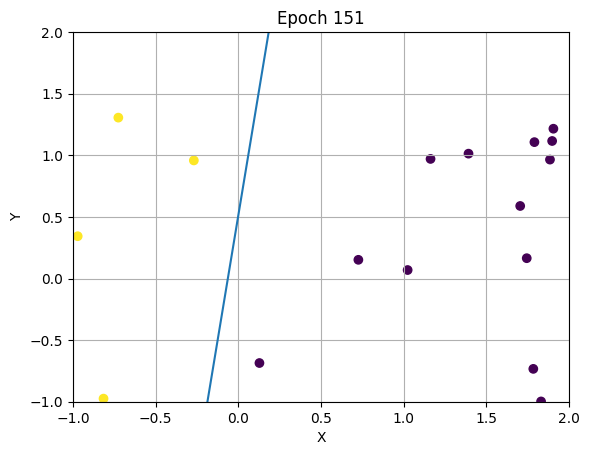

Epoch  152  :  0.04765903495844862
Epoch  153  :  0.047067004566288845
Epoch  154  :  0.04648588595077659
Epoch  155  :  0.04591541369762521
Epoch  156  :  0.04535533038252803
Epoch  157  :  0.044805386285331365
Epoch  158  :  0.044265339116019424
Epoch  159  :  0.04373495375196041
Epoch  160  :  0.04321400198589263
Epoch  161  :  0.04270226228414836
Epoch  162  :  0.04219951955465014
Epoch  163  :  0.04170556492422729
Epoch  164  :  0.041220195524833254
Epoch  165  :  0.040743214288257154
Epoch  166  :  0.040274429748949674
Epoch  167  :  0.03981365585459913
Epoch  168  :  0.039360711784112726
Epoch  169  :  0.038915421772675825
Epoch  170  :  0.03847761494357519
Epoch  171  :  0.03804712514649372
Epoch  172  :  0.03762379080199079
Epoch  173  :  0.037207454751902305
Epoch  174  :  0.036797964115404
Epoch  175  :  0.036395170150496314
Epoch  176  :  0.03599892812067852
Epoch  177  :  0.03560909716659128
Epoch  178  :  0.0352255401824185
Epoch  179  :  0.03484812369684944
Epoch  180  :

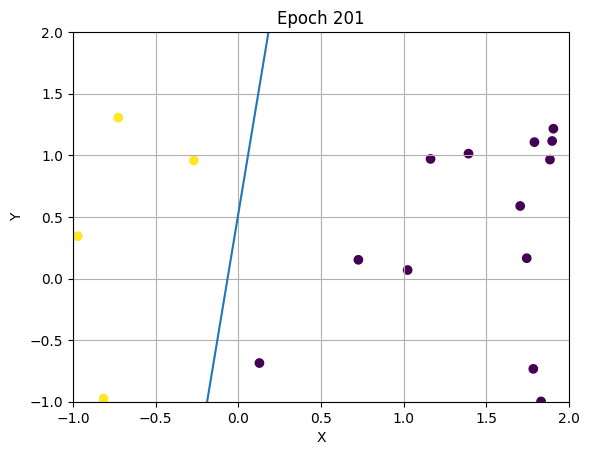

Epoch  202  :  0.027601518130276063
Epoch  203  :  0.027339162470511297
Epoch  204  :  0.027080517870365892
Epoch  205  :  0.02682551485443269
Epoch  206  :  0.026574085561625282
Epoch  207  :  0.026326163700476163
Epoch  208  :  0.026081684505869698
Epoch  209  :  0.025840584697156044
Epoch  210  :  0.025602802437599166
Epoch  211  :  0.025368277295105858
Epoch  212  :  0.025136950204195124
Epoch  213  :  0.024908763429159698
Epoch  214  :  0.024683660528378726
Epoch  215  :  0.02446158631974025
Epoch  216  :  0.024242486847135227
Epoch  217  :  0.02402630934798391
Epoch  218  :  0.023813002221760214
Epoch  219  :  0.023602514999477648
Epoch  220  :  0.02339479831410423
Epoch  221  :  0.023189803871874904
Epoch  222  :  0.02298748442446822
Epoch  223  :  0.02278779374202081
Epoch  224  :  0.022590686586949252
Epoch  225  :  0.022396118688550657
Epoch  226  :  0.022204046718359582
Epoch  227  :  0.022014428266230544
Epoch  228  :  0.021827221817127138
Epoch  229  :  0.02164238672858897

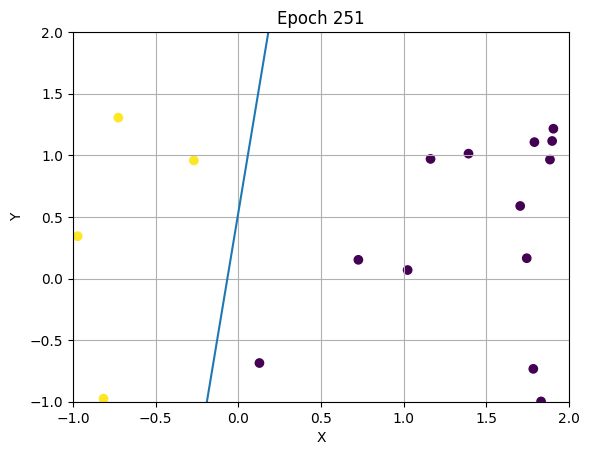

Epoch  252  :  0.017963647846004502
Epoch  253  :  0.01782546322696327
Epoch  254  :  0.01768886318177774
Epoch  255  :  0.017553823622999395
Epoch  256  :  0.01742032091835199
Epoch  257  :  0.017288331880466225
Epoch  258  :  0.017157833756881465
Epoch  259  :  0.01702880422030938
Epoch  260  :  0.016901221359149798
Epoch  261  :  0.016775063668253192
Epoch  262  :  0.016650310039919878
Epoch  263  :  0.016526939755131857
Epoch  264  :  0.016404932475008755
Epoch  265  :  0.01628426823248147
Epoch  266  :  0.016164927424177772
Epoch  267  :  0.016046890802513914
Epoch  268  :  0.0159301394679848
Epoch  269  :  0.01581465486164923
Epoch  270  :  0.015700418757802363
Epoch  271  :  0.015587413256832302
Epoch  272  :  0.015475620778253873
Epoch  273  :  0.015365024053914877
Epoch  274  :  0.01525560612137112
Epoch  275  :  0.015147350317423524
Epoch  276  :  0.015040240271814836
Epoch  277  :  0.014934259901079829
Epoch  278  :  0.01482939340254598
Epoch  279  :  0.014725625248478981
Ep

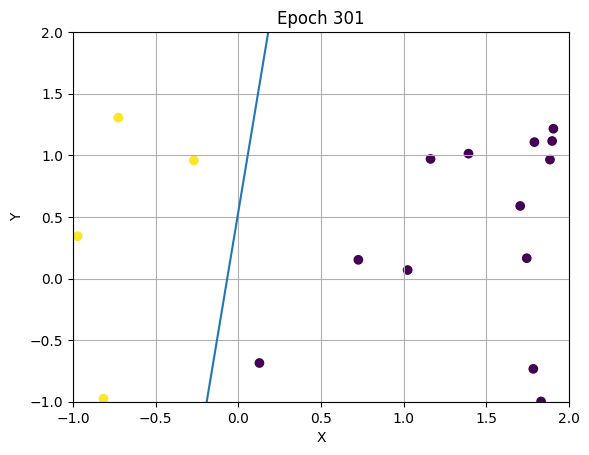

Epoch  302  :  0.012610073844453505
Epoch  303  :  0.012528632328176366
Epoch  304  :  0.012447975754069028
Epoch  305  :  0.012368094082838963
Epoch  306  :  0.012288977434968654
Epoch  307  :  0.012210616087677447
Epoch  308  :  0.012133000471950796
Epoch  309  :  0.012056121169634988
Epoch  310  :  0.01197996891059464
Epoch  311  :  0.01190453456993429
Epoch  312  :  0.011829809165278572
Epoch  313  :  0.011755783854113246
Epoch  314  :  0.011682449931182264
Epoch  315  :  0.011609798825942765
Epoch  316  :  0.011537822100073673
Epoch  317  :  0.011466511445038189
Epoch  318  :  0.011395858679698634
Epoch  319  :  0.01132585574798218
Epoch  320  :  0.011256494716596378
Epoch  321  :  0.011187767772792295
Epoch  322  :  0.011119667222176822
Epoch  323  :  0.011052185486568935
Epoch  324  :  0.010985315101902853
Epoch  325  :  0.010919048716174206
Epoch  326  :  0.010853379087429496
Epoch  327  :  0.01078829908179709
Epoch  328  :  0.010723801671559901
Epoch  329  :  0.010659879933267

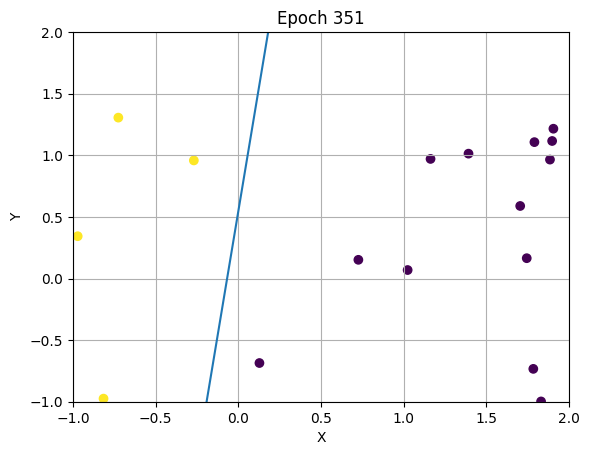

Epoch  352  :  0.00933406153282773
Epoch  353  :  0.0092821203623048
Epoch  354  :  0.009230610859076217
Epoch  355  :  0.00917952825914067
Epoch  356  :  0.009128867863965422
Epoch  357  :  0.009078625039411117
Epoch  358  :  0.009028795214676527
Epoch  359  :  0.008979373881263485
Epoch  360  :  0.008930356591961753
Epoch  361  :  0.008881738959852552
Epoch  362  :  0.008833516657331824
Epoch  363  :  0.008785685415150816
Epoch  364  :  0.008738241021475723
Epoch  365  :  0.008691179320964033
Epoch  366  :  0.008644496213858936
Epoch  367  :  0.008598187655100105
Epoch  368  :  0.00855224965345125
Epoch  369  :  0.008506678270643579
Epoch  370  :  0.00846146962053547
Epoch  371  :  0.00841661986828736
Epoch  372  :  0.008372125229552212
Epoch  373  :  0.008327981969679949
Epoch  374  :  0.008284186402937889
Epoch  375  :  0.008240734891743637
Epoch  376  :  0.008197623845913798
Epoch  377  :  0.008154849721924786
Epoch  378  :  0.008112409022187824
Epoch  379  :  0.00807029829433713


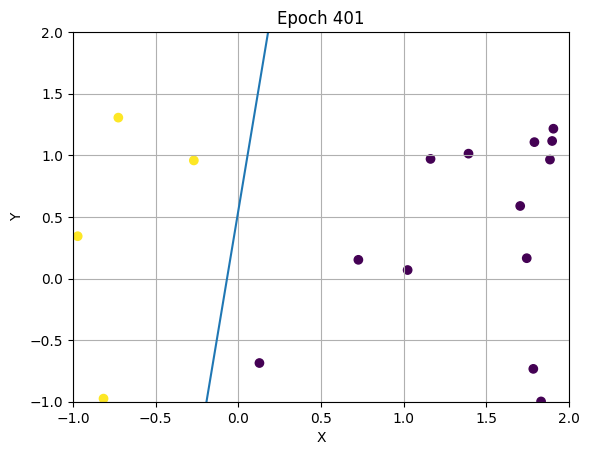

Epoch  402  :  0.007185506489868435
Epoch  403  :  0.007150385628909003
Epoch  404  :  0.0071155212843146635
Epoch  405  :  0.007080910966770644
Epoch  406  :  0.0070465522170582665
Epoch  407  :  0.007012442605618992
Epoch  408  :  0.006978579732127073
Epoch  409  :  0.006944961225068619
Epoch  410  :  0.006911584741327779
Epoch  411  :  0.006878447965780283
Epoch  412  :  0.006845548610893235
Epoch  413  :  0.006812884416331806
Epoch  414  :  0.006780453148572527
Epoch  415  :  0.00674825260052247
Epoch  416  :  0.006716280591145577
Epoch  417  :  0.006684534965094687
Epoch  418  :  0.0066530135923489305
Epoch  419  :  0.006621714367858479
Epoch  420  :  0.006590635211194014
Epoch  421  :  0.0065597740662022746
Epoch  422  :  0.006529128900667019
Epoch  423  :  0.006498697705976066
Epoch  424  :  0.006468478496792936
Epoch  425  :  0.006438469310734431
Epoch  426  :  0.006408668208052957
Epoch  427  :  0.006379073271324281
Epoch  428  :  0.006349682605140345
Epoch  429  :  0.00632049

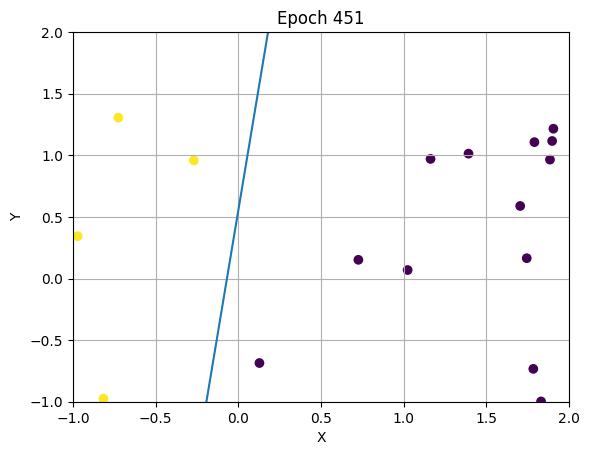

Epoch  452  :  0.005701018099133193
Epoch  453  :  0.005676176837363304
Epoch  454  :  0.005651497393327215
Epoch  455  :  0.005626978365924079
Epoch  456  :  0.005602618369172563
Epoch  457  :  0.005578416032015852
Epoch  458  :  0.005554369998129118
Epoch  459  :  0.005530478925730385
Epoch  460  :  0.005506741487393594
Epoch  461  :  0.005483156369865008
Epoch  462  :  0.005459722273882225
Epoch  463  :  0.005436437913995651
Epoch  464  :  0.005413302018392833
Epoch  465  :  0.005390313328725349
Epoch  466  :  0.005367470599938106
Epoch  467  :  0.005344772600101525
Epoch  468  :  0.005322218110245938
Epoch  469  :  0.005299805924198039
Epoch  470  :  0.005277534848420692
Epoch  471  :  0.0052554037018541725
Epoch  472  :  0.00523341131576007
Epoch  473  :  0.005211556533567612
Epoch  474  :  0.005189838210721919
Epoch  475  :  0.005168255214534864
Epoch  476  :  0.005146806424037454
Epoch  477  :  0.005125490729835006
Epoch  478  :  0.0051043070339639686
Epoch  479  :  0.0050832542

In [8]:
w1, erreur1 = apprentissage_widrow(Data1.T, CLASSIF, 500, 25)
print('W1 : ', w1)

**Indiquez graphiquement quelques étapes de l’apprentissage (ensemble et droite de séparation)**

Voir ci-dessus.

**Représentez l’erreur en fonction des itérations**

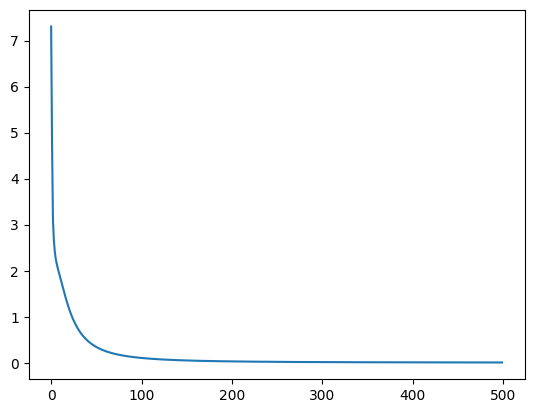

In [9]:
plt.title("Erreur en fonction du nombre d'itérations")
plt.plot(erreur1)
plt.show()

**Faites quelques tests avec des initialisations différentes, commentez le résultat après convergence**

On observe que l'erreur de classification tend vers 0. On remarque également que la droite séparatrice est bien la droite qui sépare les deux classes.

#### 1.2.3. Test 2

* *Charger les données p2_d2.txt*

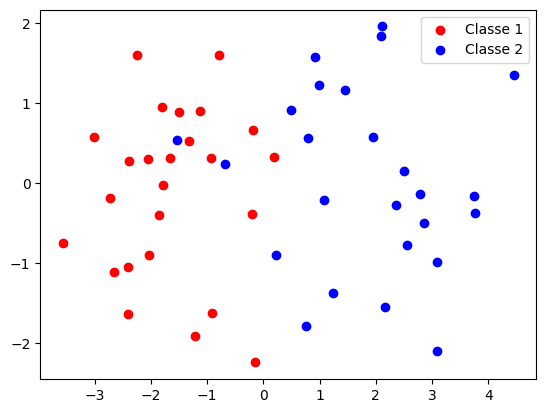

In [10]:
P2_DATA = np.loadtxt("res/p2_d2.txt")

plt.title("Ensemble de données chargées depuis p2_d2.txt")
plt.scatter(P2_DATA[0, :25], P2_DATA[1, :25], c='r')
plt.scatter(P2_DATA[0, 25:], P2_DATA[1, 25:], c='b')
plt.legend(['Classe 1', 'Classe 2'])
plt.show()

* *Appliquez l'algorithme d'apprentissage sur les données. Afficher l'évolution de l'erreur. Vérifier que la frontière est correcte*

Epoch  1  :  11.59897249346598


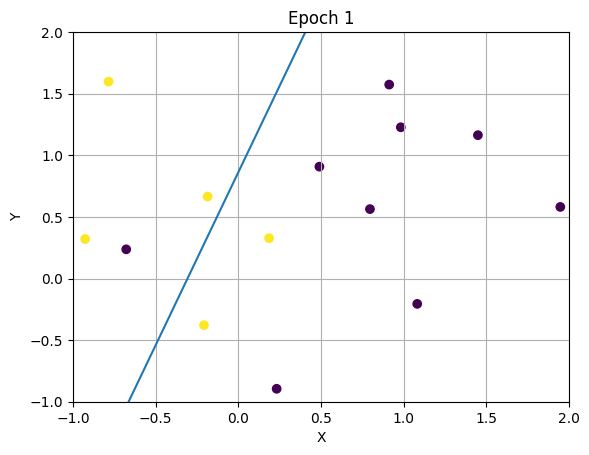

Epoch  2  :  4.712916843461364
Epoch  3  :  3.8792260186781755
Epoch  4  :  4.227114833975862
Epoch  5  :  4.614436086848928
Epoch  6  :  4.973094078841921
Epoch  7  :  4.566770285444988
Epoch  8  :  3.433770690635169
Epoch  9  :  2.941528601034637
Epoch  10  :  2.7217609010505552
Epoch  11  :  2.599388756770252
Epoch  12  :  2.52492274489727
Epoch  13  :  2.478109785037214
Epoch  14  :  2.4488124524529646
Epoch  15  :  2.4313352678816678
Epoch  16  :  2.4222083539277652
Epoch  17  :  2.4191740665263457
Epoch  18  :  2.420676641331886
Epoch  19  :  2.42558750739318
Epoch  20  :  2.433049959755141
Epoch  21  :  2.442388011564995
Epoch  22  :  2.453051502094394
Epoch  23  :  2.4645825343312544
Epoch  24  :  2.4765948372521085
Epoch  25  :  2.488761067552064
Epoch  26  :  2.5008049442389617
Epoch  27  :  2.5124962036909113
Epoch  28  :  2.5236470493751235
Epoch  29  :  2.5341092372931047
Epoch  30  :  2.5437712760911615
Epoch  31  :  2.5525554709302147
Epoch  32  :  2.560414720753475
Epoc

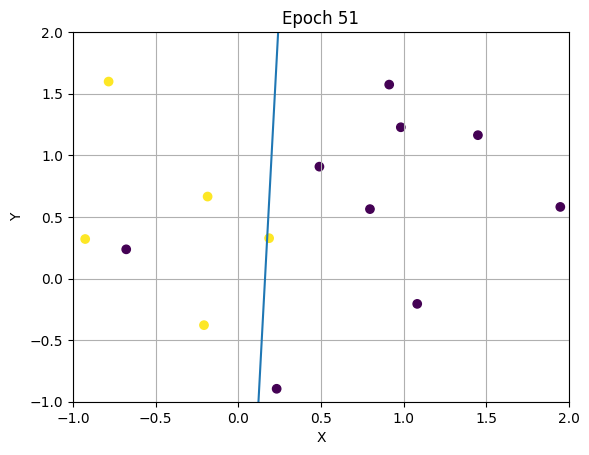

Epoch  52  :  2.591164234842483
Epoch  53  :  2.5922585312547817
Epoch  54  :  2.5938723714923864
Epoch  55  :  2.5960675233933066
Epoch  56  :  2.5989016812953842
Epoch  57  :  2.602428119078998
Epoch  58  :  2.606695296438179
Epoch  59  :  2.6117464145959937
Epoch  60  :  2.6176189200951647
Epoch  61  :  2.624343958166696
Epoch  62  :  2.6319457805810673
Epoch  63  :  2.6404411168572737
Epoch  64  :  2.649838522234515
Epoch  65  :  2.6601377208221404
Epoch  66  :  2.6713289676721743
Epoch  67  :  2.6833924588993505
Epoch  68  :  2.696297824025479
Epoch  69  :  2.7100037389525884
Epoch  70  :  2.7244577007772492
Epoch  71  :  2.7395960063885587
Epoch  72  :  2.7553439747855304
Epoch  73  :  2.7716164477345
Epoch  74  :  2.7883185943864826
Epoch  75  :  2.8053470327222256
Epoch  76  :  2.8225912645376945
Epoch  77  :  2.8399354019570393
Epoch  78  :  2.857260143485651
Epoch  79  :  2.8744449381284056
Epoch  80  :  2.8913702590812216
Epoch  81  :  2.9079198959439916
Epoch  82  :  2.9239

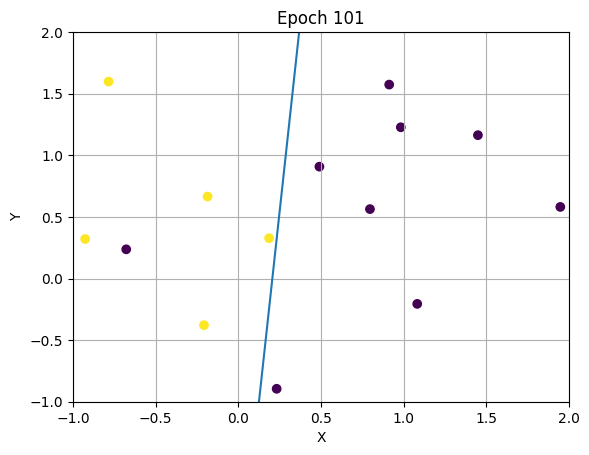

Epoch  102  :  3.063485989271024
Epoch  103  :  3.061428874939457
Epoch  104  :  3.058725237042713
Epoch  105  :  3.0554089168017278
Epoch  106  :  3.0515122120674274
Epoch  107  :  3.0470657780386476
Epoch  108  :  3.042098583657224
Epoch  109  :  3.0366379120296485
Epoch  110  :  3.030709394594975
Epoch  111  :  3.024337070190411
Epoch  112  :  3.017543461570214
Epoch  113  :  3.0103496632505
Epoch  114  :  3.002775435747105
Epoch  115  :  2.9948393023275255
Epoch  116  :  2.986558645306985
Epoch  117  :  2.9779497996863107
Epoch  118  :  2.969028142565625
Epoch  119  :  2.9598081772852107
Epoch  120  :  2.950303611657809
Epoch  121  :  2.9405274299791486
Epoch  122  :  2.930491958749847
Epoch  123  :  2.9202089262242987
Epoch  124  :  2.9096895160327967
Epoch  125  :  2.898944415211697
Epoch  126  :  2.8879838570314975
Epoch  127  :  2.8768176590424224
Epoch  128  :  2.8654552567665945
Epoch  129  :  2.853905733461245
Epoch  130  :  2.8421778463621465
Epoch  131  :  2.83028004979423

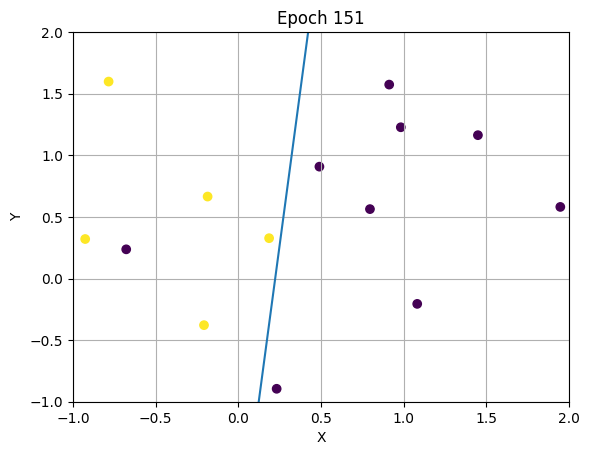

Epoch  152  :  2.5536949179060184
Epoch  153  :  2.539753232879027
Epoch  154  :  2.525779877927064
Epoch  155  :  2.511779043822348
Epoch  156  :  2.4977547997953886
Epoch  157  :  2.4837110960303423
Epoch  158  :  2.469651766093049
Epoch  159  :  2.455580529299227
Epoch  160  :  2.441500993029085
Epoch  161  :  2.427416654993748
Epoch  162  :  2.413330905457979
Epoch  163  :  2.399247029423003
Epoch  164  :  2.385168208772612
Epoch  165  :  2.3710975243852745
Epoch  166  :  2.3570379582144567
Epoch  167  :  2.342992395339
Epoch  168  :  2.328963625985093
Epoch  169  :  2.3149543475211383
Epoch  170  :  2.300967166426482
Epoch  171  :  2.2870046002348383
Epoch  172  :  2.273069079453082
Epoch  173  :  2.2591629494559093
Epoch  174  :  2.245288472356712
Epoch  175  :  2.2314478288549933
Epoch  176  :  2.21764312006049
Epoch  177  :  2.2038763692941434
Epoch  178  :  2.190149523865953
Epoch  179  :  2.176464456829776
Epoch  180  :  2.1628229687149982
Epoch  181  :  2.149226789235075
Epo

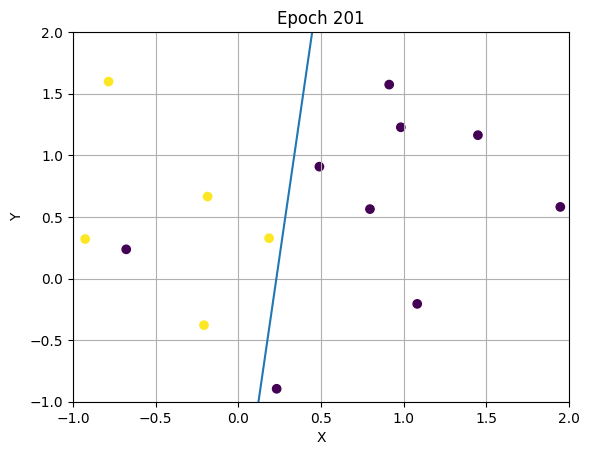

Epoch  202  :  1.876569512442182
Epoch  203  :  1.864284472834083
Epoch  204  :  1.8520685565933348
Epoch  205  :  1.8399222447774872
Epoch  206  :  1.8278459826066216
Epoch  207  :  1.8158401805524969
Epoch  208  :  1.8039052154046955
Epoch  209  :  1.7920414313139217
Epoch  210  :  1.7802491408127585
Epoch  211  :  1.7685286258139723
Epoch  212  :  1.7568801385866837
Epoch  213  :  1.7453039027105963
Epoch  214  :  1.733800114008548
Epoch  215  :  1.7223689414576386
Epoch  216  :  1.7110105280791403
Epoch  217  :  1.6997249918075559
Epoch  218  :  1.6885124263390112
Epoch  219  :  1.6773729019593226
Epoch  220  :  1.666306466351972
Epoch  221  :  1.6553131453863261
Epoch  222  :  1.6443929438863767
Epoch  223  :  1.633545846380297
Epoch  224  :  1.6227718178311261
Epoch  225  :  1.6120708043488763
Epoch  226  :  1.6014427338843755
Epoch  227  :  1.5908875169051717
Epoch  228  :  1.5804050470537656
Epoch  229  :  1.5699952017885626
Epoch  230  :  1.5596578430077377
Epoch  231  :  1.54

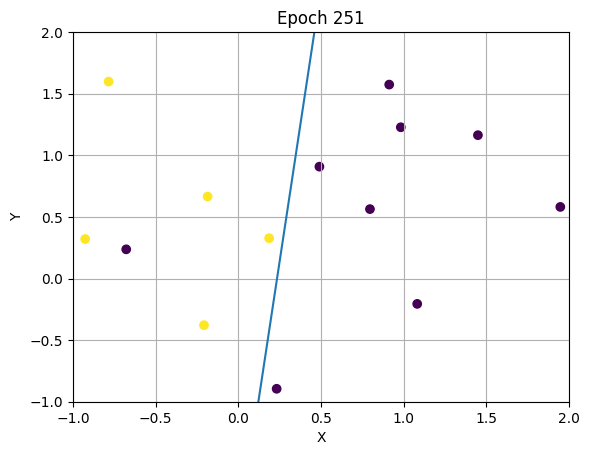

Epoch  252  :  1.3501350472293792
Epoch  253  :  1.3413990435414311
Epoch  254  :  1.3327288977373646
Epoch  255  :  1.324124242002349
Epoch  256  :  1.315584704207487
Epoch  257  :  1.3071099081870867
Epoch  258  :  1.2986994740068842
Epoch  259  :  1.2903530182234149
Epoch  260  :  1.2820701541348036
Epoch  261  :  1.2738504920231828
Epoch  262  :  1.2656936393889384
Epoch  263  :  1.2575992011770374
Epoch  264  :  1.2495667799956054
Epoch  265  :  1.2415959763270181
Epoch  266  :  1.2336863887316338
Epoch  267  :  1.2258376140444305
Epoch  268  :  1.2180492475647284
Epoch  269  :  1.2103208832391588
Epoch  270  :  1.2026521138380981
Epoch  271  :  1.1950425311257402
Epoch  272  :  1.1874917260239743
Epoch  273  :  1.1799992887702584
Epoch  274  :  1.172564809069651
Epoch  275  :  1.1651878762411816
Epoch  276  :  1.1578680793586822
Epoch  277  :  1.1506050073862841
Epoch  278  :  1.1433982493087425
Epoch  279  :  1.1362473942566698
Epoch  280  :  1.1291520316269024
Epoch  281  :  1.

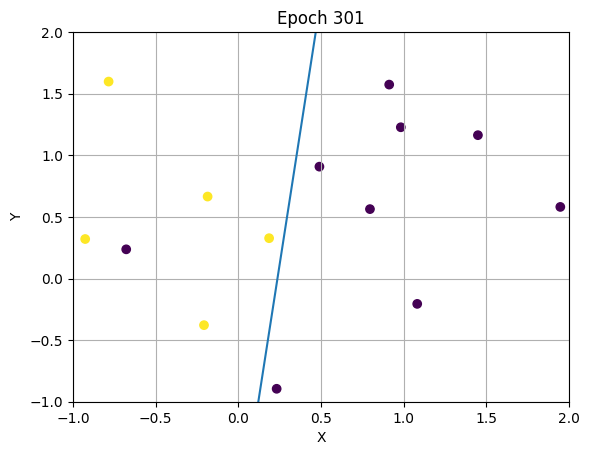

Epoch  302  :  0.9862725722987895
Epoch  303  :  0.9803422758529464
Epoch  304  :  0.9744579371875268
Epoch  305  :  0.9686191797880774
Epoch  306  :  0.9628256292246326
Epoch  307  :  0.9570769131842434
Epoch  308  :  0.9513726615014689
Epoch  309  :  0.945712506186981
Epoch  310  :  0.9400960814543156
Epoch  311  :  0.9345230237448298
Epoch  312  :  0.9289929717509182
Epoch  313  :  0.9235055664376052
Epoch  314  :  0.9180604510624931
Epoch  315  :  0.912657271194178
Epoch  316  :  0.9072956747291745
Epoch  317  :  0.90197531190739
Epoch  318  :  0.8966958353262194
Epoch  319  :  0.8914568999532992
Epoch  320  :  0.8862581631379742
Epoch  321  :  0.8810992846215248
Epoch  322  :  0.8759799265461924
Epoch  323  :  0.8708997534630649
Epoch  324  :  0.8658584323388431
Epoch  325  :  0.8608556325615693
Epoch  326  :  0.8558910259452798
Epoch  327  :  0.8509642867337333
Epoch  328  :  0.8460750916031606
Epoch  329  :  0.8412231196640968
Epoch  330  :  0.8364080524623664
Epoch  331  :  0.8

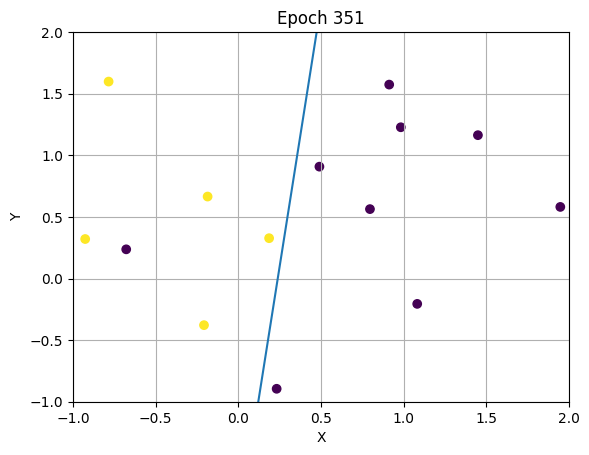

Epoch  352  :  0.7391995711205066
Epoch  353  :  0.7351509766204309
Epoch  354  :  0.73113236478731
Epoch  355  :  0.7271434764266507
Epoch  356  :  0.7231840545923963
Epoch  357  :  0.7192538445744571
Epoch  358  :  0.7153525938860039
Epoch  359  :  0.7114800522505803
Epoch  360  :  0.7076359715889726
Epoch  361  :  0.7038201060059244
Epoch  362  :  0.7000322117766681
Epoch  363  :  0.6962720473332981
Epoch  364  :  0.6925393732509825
Epoch  365  :  0.6888339522340383
Epoch  366  :  0.6851555491018881
Epoch  367  :  0.6815039307748834
Epoch  368  :  0.6778788662600244
Epoch  369  :  0.6742801266365771
Epoch  370  :  0.6707074850416085
Epoch  371  :  0.6671607166554124
Epoch  372  :  0.6636395986869023
Epoch  373  :  0.6601439103589004
Epoch  374  :  0.6566734328933861
Epoch  375  :  0.6532279494966959
Epoch  376  :  0.6498072453446707
Epoch  377  :  0.6464111075677694
Epoch  378  :  0.6430393252361524
Epoch  379  :  0.6396916893447468
Epoch  380  :  0.6363679927982854
Epoch  381  :  0

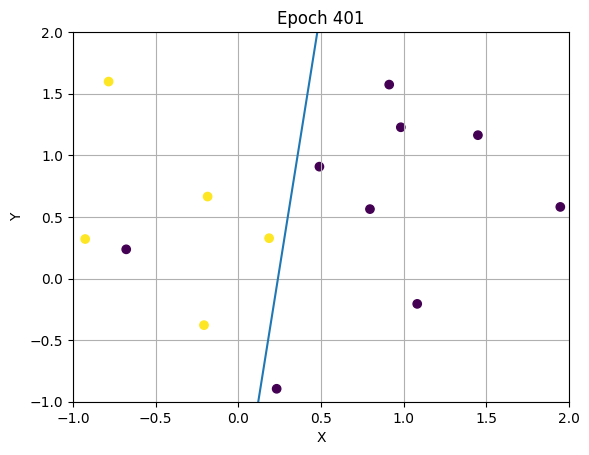

Epoch  402  :  0.5689073383726461
Epoch  403  :  0.5660812579246397
Epoch  404  :  0.5632746807718145
Epoch  405  :  0.5604874427504424
Epoch  406  :  0.5577193812265315
Epoch  407  :  0.5549703350819585
Epoch  408  :  0.5522401447006845
Epoch  409  :  0.5495286519550603
Epoch  410  :  0.5468357001922062
Epoch  411  :  0.5441611342204714
Epoch  412  :  0.5415048002959814
Epoch  413  :  0.5388665461092703
Epoch  414  :  0.5362462207719931
Epoch  415  :  0.5336436748037279
Epoch  416  :  0.5310587601188722
Epoch  417  :  0.5284913300136171
Epoch  418  :  0.5259412391530169
Epoch  419  :  0.5234083435581453
Epoch  420  :  0.5208925005933459
Epoch  421  :  0.518393568953574
Epoch  422  :  0.5159114086518249
Epoch  423  :  0.5134458810066588
Epoch  424  :  0.5109968486298248
Epoch  425  :  0.5085641754139608
Epoch  426  :  0.506147726520401
Epoch  427  :  0.5037473683670787
Epoch  428  :  0.5013629686165111
Epoch  429  :  0.49899439616388735
Epoch  430  :  0.4966415211252519
Epoch  431  :  

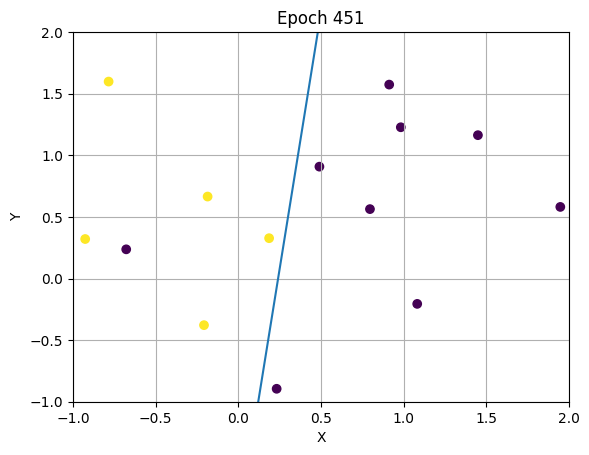

Epoch  452  :  0.44860152515262935
Epoch  453  :  0.4465764815469739
Epoch  454  :  0.44456435532106153
Epoch  455  :  0.44256504354625903
Epoch  456  :  0.44057844424035825
Epoch  457  :  0.4386044563582582
Epoch  458  :  0.4366429797827214
Epoch  459  :  0.43469391531524
Epoch  460  :  0.43275716466695313
Epoch  461  :  0.4308326304496875
Epoch  462  :  0.4289202161670611
Epoch  463  :  0.4270198262056767
Epoch  464  :  0.4251313658263983
Epoch  465  :  0.4232547411557196
Epoch  466  :  0.42138985917720273
Epoch  467  :  0.4195366277230089
Epoch  468  :  0.4176949554655114
Epoch  469  :  0.41586475190898115
Epoch  470  :  0.41404592738136675
Epoch  471  :  0.41223839302613763
Epoch  472  :  0.41044206079422574
Epoch  473  :  0.4086568434360345
Epoch  474  :  0.40688265449352456
Epoch  475  :  0.40511940829238857
Epoch  476  :  0.40336701993429147
Epoch  477  :  0.40162540528919793
Epoch  478  :  0.3998944809877626
Epoch  479  :  0.39817416441381326
Epoch  480  :  0.3964643736968948
E

In [11]:
w2, erreur2 = apprentissage_widrow(P2_DATA.T, CLASSIF, 500, 25)
print('W2 : ', w2)

**Indiquez graphiquement quelques étapes de l’apprentissage (ensemble et droite de séparation).**

Voir ci-dessus.

**Représentez l’erreur en fonction des itérations. Comparez avec le test précédent.**

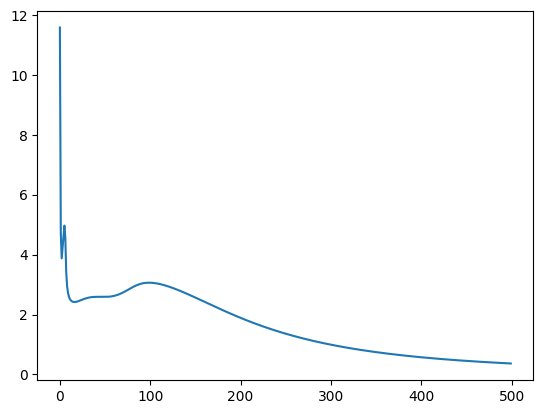

In [12]:
plt.title("Erreur en fonction du nombre d'itérations")
plt.plot(erreur2)
plt.show()

On observe pour ce deuxième échantillon que l'erreur de classification ne tend pas vers 0. En effet, il y a des individus qui sont mal classés. Dû à la nature des données, il est difficile de trouver une droite séparatrice qui sépare les deux classes. Pour autant, on observe que la droite séparatrice est bien la droite qui sépare les deux classes au mieux. Il est également intéressant de noter que l'erreur réaugmente pendant un certain temps puis diminue à nouveau cette fois-ci vers 0.

**Faites quelques tests avec des initialisations différentes, commenter le résultat après convergence.**

Voir ci-dessus.

### 1.3 Perceptron multicouches

#### 1.3.1. Mise en place d'un perceptron multicouche

* *Créez la fonction `multiperceptron(x, w1, w2)`*

In [13]:
def multiperceptron(x, w1, w2):
    
    def activation(x): 
        return 1 / (1 + np.exp(-x))

    x = np.array([1, x[0], x[1]])

    u1 = np.dot(w1[:, 0], x)
    u2 = np.dot(w1[:, 1], x)

    y1 = activation(u1)
    y2 = activation(u2)

    uf = np.dot(w2, np.array([1, y1, y2]))
    
    yf = activation(uf)

    return ([y1, y2], yf)


**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisée pour développer le perceptron Multicouche**

Nous avons tout d'abord créé une fonction `sigmoid` qui prend en paramètre un vecteur et qui renvoie le vecteur des valeurs de la fonction sigmoïde appliquée à chaque élément du vecteur. Ensuite nous avons créé la fonction `multiperceptron` qui prend en paramètre un vecteur `x` et deux matrices `w1` et `w2`. Cette fonction renvoie la sortie du perceptron multicouche. Pour cela, nous avons tout d'abord traversé la couche cachée en appliquant la fonction sigmoïde à la multiplication de `x` et `w1`. Ensuite nous avons traversé la couche de sortie en appliquant la fonction sigmoïde à la multiplication du résultat précédent et `w2`. Enfin, nous avons renvoyé le résultat de la couche de sortie.

* *Testez votre perceptron multicouches avec l'exemple ci-dessous pour un entrée `x = [1 1]` :*  
  
<img src="exemple_1_3_1.jpg" width="600">

**Indiquez le résultat numérique et par calcul (en donnant le détail) pour le test demandé**

In [14]:
x = np.array([1, 1])
w1 = np.array([[-.5, .5], [2., .5], [-1., 1.]])
w2 = np.array([2., -1., 1.])

result = multiperceptron(x, w1, w2)

print('y1 =', result[0][0])
print('y2 =', result[0][1])
print('yf =', result[1])

([0.6224593312018546, 0.8807970779778823], 0.9053673095402572)


On observe ci-dessus que le résultat est environ égal à 0.91. Pour le calcul, on a :

u1 = 1 * -0.5 + 1 * 2 + 1 * -1 = 0.5  
y1 = 1 / (1 + exp(-0.5)) = 0.62
 
u2 = 1 * 0.5 + 1 * 0.5 + 1 * 1 = 2  
y2 = 1 / (1 + exp(-2)) = 0.88

uf = 1 * 2 + 0.62 * -1 + 0.88 * 1 = 2.26  
yf = 1 / (1 + exp(-uf)) = 0.91

#### 1.3.2. Programmation apprentissage multicouches

* *Créez une fonction `multiperceptron_widrow(x, yd, epoch, batch_size)`*

In [15]:
ALPHA = 0.5

def multiperceptron_widrow(x, yd, epoch, batch_size):
    def derivative(x): 
        return x * (1 - x)

    w1 = np.random.rand(3, 2) - 0.5
    w2 = np.random.rand(3) - 0.5
    new_w1 = np.zeros((3, 2))
    new_w2 = np.zeros((3))
    errors = np.zeros((epoch))

    for i in range(epoch):
        for j in range(x.shape[1]):
            indiv = x[:, j]
            target = yd[j]

            y1_predict, yf_predict = multiperceptron(indiv, w1, w2)

            errors[i] += (target - yf_predict)**2

            rf = -(target - yf_predict) * derivative(yf_predict)

            r11 = w2[1] * rf * derivative(y1_predict[0])
            r12 = w2[2] * rf * derivative(y1_predict[1])

            indiv = np.array([1, indiv[0], indiv[1]])

            new_w1[:, 0] += - ALPHA * r11 * indiv
            new_w1[:, 1] += - ALPHA * r12 * indiv

            y1_predict = np.array([1, y1_predict[0], y1_predict[1]])

            new_w2 += - ALPHA * rf * y1_predict

            if j % batch_size == 0:
                w1 += new_w1
                w2 += new_w2
                new_w1 = np.zeros((3, 2))
                new_w2 = np.zeros((3))
                
        error = round(errors[i], 3)

        print("epoch", i + 1, " : ", error)

        if error < 0.01:
            break

    return w1, w2, errors

**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisée pour développer l’apprentissage Multicouche.**

Nous avons tout d'abord créé une fonction `multiperceptron_widrow` qui prend en paramètre un vecteur `x`, un vecteur `yd`, un entier `epoch` et un entier `batch_size`. Cette fonction renvoie les matrices `w1` et `w2` et `errors` après apprentissage. Pour cela, nous avons tout d'abord créé les matrices `w1` et `w2` aléatoirement. Ensuite nous avons créé une boucle qui va s'exécuter `epoch` fois. Dans cette boucle, nous passons par chaque individu de l'échantillon `x`. Pour chaque individu, nous calculons la sortie du perceptron multicouche. Ensuite nous calculons l'erreur de classification. Enfin nous mettons à jour les matrices `w1` et `w2` tous les `batch_size` individus. Enfin nous renvoyons les matrices `w1` et `w2` et `errors`.

* *Créez l'ensemble d'apprentissage*

In [16]:
x = np.array([[0, 1, 0, 1], [0, 0, 1, 1]])
yd = np.array([0, 1, 1, 0])
epoch = 20000

* *Affichez cet ensemble avec la fonction `affiche_classe`*

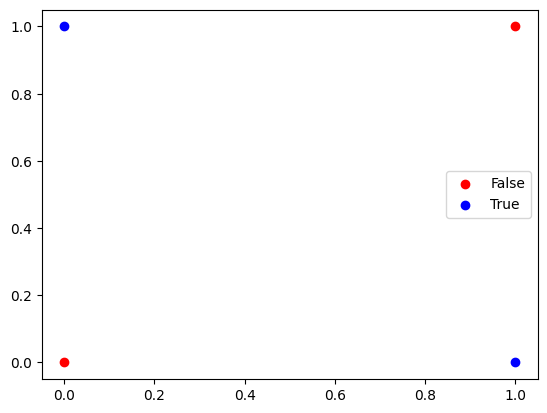

In [17]:
plt.scatter(x[0, yd == 0], x[1, yd == 0], c='r')
plt.scatter(x[0, yd == 1], x[1, yd == 1], c='b')
plt.legend(['False', 'True'])
plt.show()

* *Pensez-vous que ce problème puisse être traité par un perceptron simple ?*

Nous ne pouvons pas traiter ce problème avec un perceptron simple car il n'est pas linéairement séparable. En effet, il n'existe pas de droite qui sépare les deux classes.

* *Appliquez votre algorithme d'apprentissage*

In [18]:
w1, w2, erreur = multiperceptron_widrow(x, yd, epoch, 4)
print(erreur)

epoch 1  :  1.026
epoch 2  :  0.998
epoch 3  :  0.998
epoch 4  :  0.999
epoch 5  :  0.999
epoch 6  :  0.999
epoch 7  :  1.0
epoch 8  :  1.0
epoch 9  :  1.0
epoch 10  :  1.0
epoch 11  :  1.0
epoch 12  :  1.0
epoch 13  :  1.0
epoch 14  :  1.0
epoch 15  :  1.0
epoch 16  :  1.0
epoch 17  :  1.0
epoch 18  :  1.0
epoch 19  :  1.0
epoch 20  :  1.0
epoch 21  :  1.001
epoch 22  :  1.001
epoch 23  :  1.001
epoch 24  :  1.001
epoch 25  :  1.001
epoch 26  :  1.001
epoch 27  :  1.001
epoch 28  :  1.001
epoch 29  :  1.001
epoch 30  :  1.001
epoch 31  :  1.001
epoch 32  :  1.001
epoch 33  :  1.001
epoch 34  :  1.001
epoch 35  :  1.001
epoch 36  :  1.001
epoch 37  :  1.001
epoch 38  :  1.001
epoch 39  :  1.001
epoch 40  :  1.001
epoch 41  :  1.001
epoch 42  :  1.001
epoch 43  :  1.001
epoch 44  :  1.001
epoch 45  :  1.001
epoch 46  :  1.001
epoch 47  :  1.001
epoch 48  :  1.001
epoch 49  :  1.0
epoch 50  :  1.0
epoch 51  :  1.0
epoch 52  :  1.0
epoch 53  :  1.0
epoch 54  :  1.0
epoch 55  :  1.0
epoch 

**Représentez l’erreur en fonction des itérations. Commentez.**

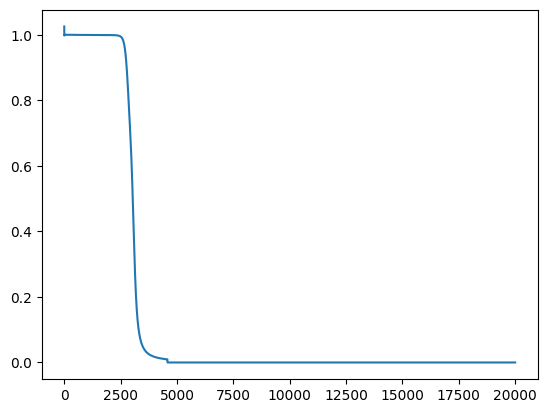

In [19]:
plt.plot(erreur)
plt.show()

Voir ci-dessus.

* *Testez, à partir de votre fonction `multiperceptron`, le réseau de neurones ainsi obtenu sur l'ensemble d'apprentissage*

**Testez votre structure après apprentissage et montrez que c’est bien un XOR.**

In [20]:
def get_y_result(x_coords):
    return round(
        multiperceptron(np.array(x_coords), w1, w2)[1]
    )

print('x = [0, 0] | y =', get_y_result([0, 0]))
print('x = [0, 1] | y =', get_y_result([0, 1]))
print('x = [1, 0] | y =', get_y_result([1, 0]))
print('x = [1, 1] | y =', get_y_result([1, 1]))

x = [0, 0] | y = 0
x = [0, 1] | y = 1
x = [1, 0] | y = 1
x = [1, 1] | y = 0


On observe ci-dessus que le résultat est bien un XOR. En effet, on a pour :  
- `x = [0 0]` => `y = 0`  
- `x = [0 1]` => `y = 1`  
- `x = [1 0]` => `y = 1`  
- `x = [1 1]` => `y = 0`  

* *Affichez les droites séparatrices associées aux différents neurones et les points de l'ensemble d'apprentissage*

**Représentez les trois droites séparatrices et l’ensemble d’apprentissage. Expliquez le fonctionnement.**

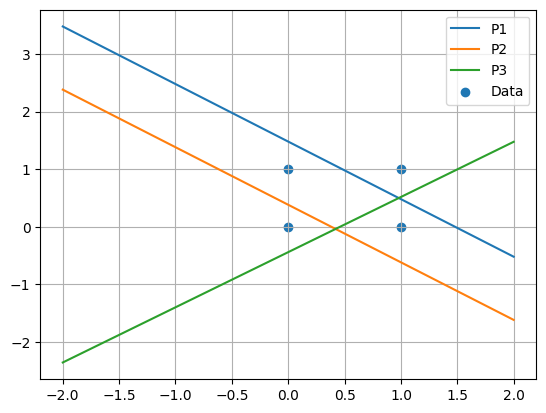

In [21]:
x = np.linspace(-2, 2)

y = (w1[0, 0] + x*w1[1, 0]) / (-w1[2, 0])
y2 = (w1[0, 1] + x*w1[1, 1]) / (-w1[2, 1])
y3 = (w2[0] + x*w2[1]) / (-w2[2])

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.scatter(X[:, 0], X[:, 1])
plt.legend(['P1', 'P2', 'P3', 'Data'])
plt.grid()
plt.show()

Voir ci-dessus. On observe bien que les droites permettent de séparer les deux classes.

## 2. Deep et Full-connected : discrimination d'une image

### 2.1. Approche basée Descripteurs (basée modèle)

#### 2.1.1. Calcul des descripteurs

* *Importez les différents tableaux de mesure et créez un vecteur de label indiquant la classe sous forme d'un chiffre de chaque image*

In [53]:
import pandas as pd

WANG_PATH = "res\\WangSignatures.xlsx"

# Definition of categories of the dataset
CATEGORIES = [
    'Jungle',
    'Plage',
    'Monuments',
    'Bus',
    'Dinosaures',
    'Éléphants',
    'Fleurs',
    'Chevaux',
    'Montagne',
    'Plats'
]

Measures = []

for i in range(5):

    X = pd.read_excel(
        WANG_PATH,
        sheet_name = i,
        index_col = 0,
        header = None
    )

    if i == 0: Measures = X.values
    else:
        Data = X.values
        Measures = (np.concatenate((Measures, Data), axis = 1))

Labels = np.array([
    int(nom[0:-4]) // 100 for nom in X.index
])

**Explicitez comment sous Python vous avez importé et créé votre corpus : vecteurs de labels, ensemble d'apprentissage, ensemble de tests.**

Afin d'importer les différents tableaux de mesure, nous nous sommes servis de la fonction `read_excel` fournie par la librairie `pandas` et qui était la plus appropriée à notre besoin. Nous avons au préalable établi un tableau des catégories `CATEGORIES` de manière à pouvoir récupérer le nom de la catégorie à partir de la classe définie, et plus tard prédite.

Pour chacune des images, nous avons récupérer les valeurs contenues dans l'ensemble de mesures `PHOG` dans un premier temps (telles quel), puis pour le reste des ensembles, nous avons choisi de concaténer les nouvelles mesures aux précédentes. En guise d'illustration, voici à quoi ressemble la combinaison pour une image `img` donnée :  
* `Measures[img] = [ [PHOG], [JCD], [CEDD], [FCTH], [FuzzyColorHistogram] ]`



#### 2.1.2. Mise en place d'un système de discrimination basé structure Full-Connected

* *Mettez en place un système de discrimination qui pour la présentation d'une image inconnue et de son vecteur de mesures associé propose une classe*

In [57]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Target = np.array([np.eye(10)[Labels[i]] for i in range(len(Labels))])

X_train, X_test, Y_train, Y_test = train_test_split(
    Measures,
    Target,
    test_size = 0.2, # Fixed value to 2% of the dataset
    random_state = 1,
    stratify = Labels
)

# Building of the dense model
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    validation_split = 0.8,
    epochs = 40, batch_size = 32,
    verbose = 0
)

Y_predict = model.predict(X_test, verbose=0)

**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisé pour développer le perceptron Full Connected.**

Pour développer notre perceptron ***Full Connected***, nous avons initialisé un modèle séquentiel composé de trois couches denses, rescpectivement de 128, 64 et 10 neurones. Le modèle est optimisé par adam lors de sa compilation. Nos ensembles d'apprentissage et de test sont initialisés à l'aide de la fonction `test_train_split()` fournie par `sklearn` dans laquelle nous avons chargé notre ensemble de mesures précédemment calculé puis fixé l'ensemble de test à 20%. 

* *Testez la procédure de la classification avec les 5 types de mesures et différentes images inconues.*

In [55]:
def test_image_classification(nb_images = 5):

    images = [np.random.randint(0, len(X_test)) for i in range(nb_images)]

    for img in images:
        true_class = np.argmax(Y_test[img])
        pred_class = np.argmax(Y_predict[img])
        accuracy = round(Y_predict[img][pred_class] * 100, 2)
        print(f"Image n°{img} of class {true_class} => Category [{CATEGORIES[true_class]}]")
        print(f"Model prediction : Class = {pred_class} => Category [{CATEGORIES[pred_class]}] | Accuracy = {accuracy}%")
        print()

test_image_classification()

Image n°115 of class 9 => Category [Plats]
Model prediction : Class = 9 => Category [Plats] | Accuracy = 99.7%

Image n°498 of class 0 => Category [Jungle]
Model prediction : Class = 0 => Category [Jungle] | Accuracy = 96.43%

Image n°147 of class 3 => Category [Bus]
Model prediction : Class = 3 => Category [Bus] | Accuracy = 98.4%

Image n°366 of class 8 => Category [Montagne]
Model prediction : Class = 8 => Category [Montagne] | Accuracy = 94.83%

Image n°487 of class 9 => Category [Plats]
Model prediction : Class = 5 => Category [Éléphants] | Accuracy = 98.43%



* *Analyser les résultats (matrice de confusion, taux d'erreur)*

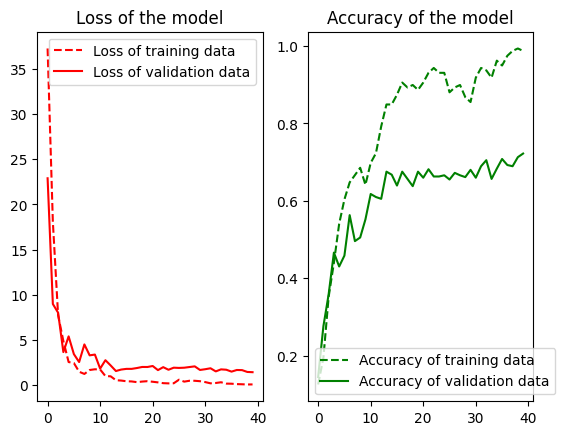

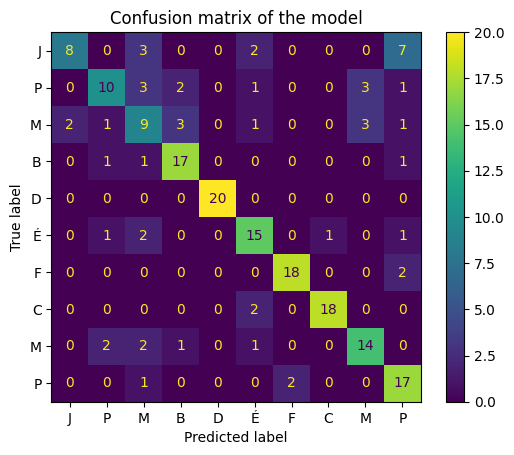

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def display_loss_accuracy():
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('Loss of the model')
    ax1.plot(history.history['loss'], 'r--', label = 'Loss of training data')
    ax1.plot(history.history['val_loss'], 'r', label = 'Loss of validation data')
    ax1.legend()
    ax2.set_title('Accuracy of the model')
    ax2.plot(history.history['accuracy'], 'g--', label = 'Accuracy of training data')
    ax2.plot(history.history['val_accuracy'], 'g', label = 'Accuracy of validation data')
    ax2.legend()

def display_confusion_matrix():
    ConfusionMatrixDisplay(
        confusion_matrix = confusion_matrix(
            np.argmax(Y_test, axis = 1),
            np.argmax(Y_predict, axis = 1)
        ),
        display_labels = [ c[0] for c in CATEGORIES ]
    ).plot()
    plt.title('Confusion matrix of the model')
    plt.show()

display_loss_accuracy()
display_confusion_matrix()

D'après la matrice de confusion, notre configuration atteint un taux de réussite moyen de **73%**, ce qui semble correspondre à la mesure de précision illustrée par le graphique.

**Comparez la qualité de la discrimination en fonction de la caractéristique utilisée ou du cumul de toutes les mesures.**

TODO : réponse

* *Comparez avec différents hyperparamètres ????(nombre de neurones, nombre de couches, nombre d'itérations, taille du batch)????*

**Avec les meilleures combinaisons de mesures, paramétrez au mieux l'algorithme Full Connected.**

In [48]:
Measures = []

for i in range(5):

    X = pd.read_excel(
        WANG_PATH,
        sheet_name = i,
        index_col = 0,
        header = None
    )
    # Only taking CEDD set of measures
    if i == 2: Measures = X.values

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(
    Measures,
    Target,
    test_size = 0.5,
    random_state = 1,
    stratify = Labels
)

# Building of the dense model
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    validation_split = 0.5,
    epochs = 100, batch_size = 32,
    verbose = 0
)

Y_predict = model.predict(X_test, verbose = 0)

Voici la meilleure combinaison trouvée :
- Construction du vecteur comprenant les mesures de chacunce des images uniquement basé sur les valurs de la feuille associée à l'ensemble **CEDD**
- 

**Avec le meilleur discriminateur, évaluez la qualité de la procédure de discrimination selon la classe d'images.**

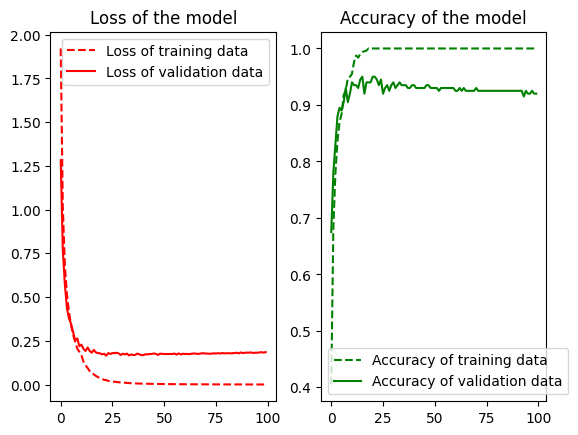

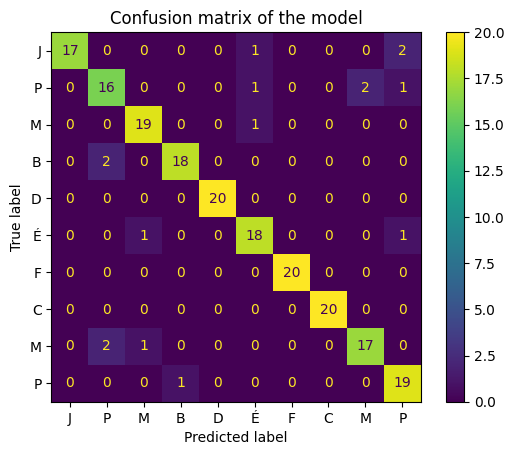

In [34]:
display_loss_accuracy()
display_confusion_matrix()

D'après la matrice de confusion, notre perceptron a un taux de réussite de 92% dans la classification des images.

In [13]:
test_image_classification()

Image n°52 of class 4 => Category [Dinosaures]
Model prediction : Class = 4 => Category [Dinosaures] | Accuracy = 99.99%

Image n°29 of class 9 => Category [Plats]
Model prediction : Class = 5 => Category [Éléphants] | Accuracy = 87.06%

Image n°176 of class 5 => Category [Éléphants]
Model prediction : Class = 5 => Category [Éléphants] | Accuracy = 99.99%

Image n°124 of class 8 => Category [Montagne]
Model prediction : Class = 8 => Category [Montagne] | Accuracy = 99.95%

Image n°120 of class 6 => Category [Fleurs]
Model prediction : Class = 6 => Category [Fleurs] | Accuracy = 99.89%



On observe qu'en modifiant les discriminateurs, la précision (et de fait la véracité) de notre classification s'est nettement améliorée.

#### 2.1.3. Approche "Deep" (basée Data)

* *Mettez en place un système de classification qui a en données une image, calcul les descripteurs par des couches de convolution*

In [ ]:
import cv2

IMAGES_PATH = 'res\\Wang\\'
IMAGE_EXT = '.jpg'
IMAGE_SIZE = 256

IMAGE_NAMES = np.array([
    (IMAGES_PATH + str(i) + IMAGE_EXT) for i in range(len(Labels))
])

X = []

Target = np.zeros([len(Labels), 10], 'int')
it = 0

for img_name in IMAGE_NAMES:
    category = int(img_name[len(IMAGES_PATH):-len(IMAGE_EXT)]) // 100
    Target[it, category] = 1
    img = cv2.resize(
        cv2.imread(img_name), # Retrieving the image
        (IMAGE_SIZE, IMAGE_SIZE)
    ) # Resizing the image
    X.append(img)
    it += 1

In [109]:
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten

dim_img = X[0].shape
X = np.array(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Target,
    test_size=0.2,
    random_state=1
)

# Building of the convolutional model
model = Sequential()
model.add(Conv2D(
    32, (3, 3),
    activation = 'relu',
    padding = 'same',
    input_shape = dim_img
))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    validation_data = (X_test, Y_test),
    epochs = 10, batch_size = 32,
    verbose = 0
)

Y_predict = model.predict(X_test, verbose=0)

**Donnez quelques éléments de commentaires sur la stratégie que vous avez utilisée pour développer votre structure Deep.**

* *Testez des structures simples*

In [120]:
test_image_classification()

Image n°151 of class 9 => Category [Plats]
Model prediction : Class = 9 => Category [Plats] | Accuracy = 85.36%

Image n°69 of class 0 => Category [Jungle]
Model prediction : Class = 0 => Category [Jungle] | Accuracy = 53.18%

Image n°115 of class 1 => Category [Plage]
Model prediction : Class = 1 => Category [Plage] | Accuracy = 52.32%

Image n°28 of class 5 => Category [Éléphants]
Model prediction : Class = 5 => Category [Éléphants] | Accuracy = 99.97%

Image n°71 of class 3 => Category [Bus]
Model prediction : Class = 0 => Category [Jungle] | Accuracy = 49.26%



**Comparez la qualité de la discrimination en fonction des caractéristiques du réseau. Étudiez notamment l'évolution de la fonction de coût/précision.**

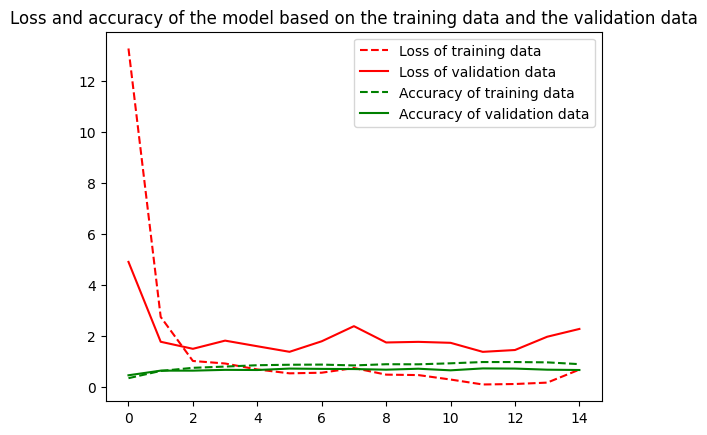

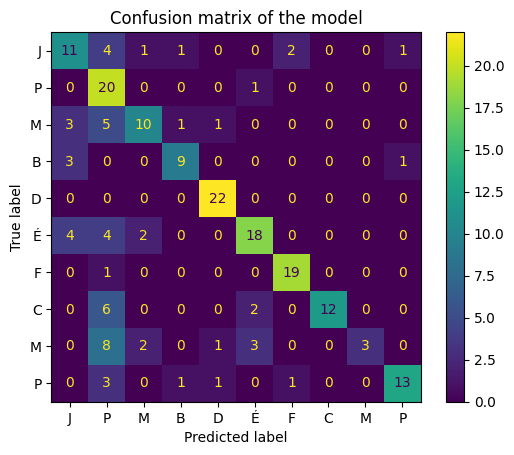

In [121]:
display_loss_accuracy()
display_confusion_matrix()

TODO : Réponse

* *Comparez les résultats avec les méthodes basées caractéristiques*

In [112]:
model = Sequential()

model.add(Conv2D(
    8, (5, 5),
    activation = 'relu',
    padding = 'same',
    input_shape = dim_img
))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(
    16, (3, 3),
    activation = 'relu',
    padding = 'same',
    input_shape = dim_img
))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    epochs=15,
    batch_size = 32,
    validation_split = 0.2,
    verbose = 0
)

Y_predict = model.predict(X_test, verbose = 0)

In [1]:
display_loss_accuracy()
display_confusion_matrix()

NameError: name 'display_loss_accuracy' is not defined

In [115]:
from keras.applications.xception import Xception
from keras.layers import GlobalAveragePooling2D
from keras.models import Model

modele_transfer = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = dim_img
)

for layer in modele_transfer.layers:
    layer.trainable = False

x = modele_transfer.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
out = Dense(10, activation='softmax')(x)

model = Model(modele_transfer.input, out)

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    epochs = 15,
    batch_size = 32,
    validation_split = 0.2,
    verbose = 0
)

Y_predict = model.predict(X_test, verbose = 0)

83683744/83683744 [==============================] - 1082s 13us/step


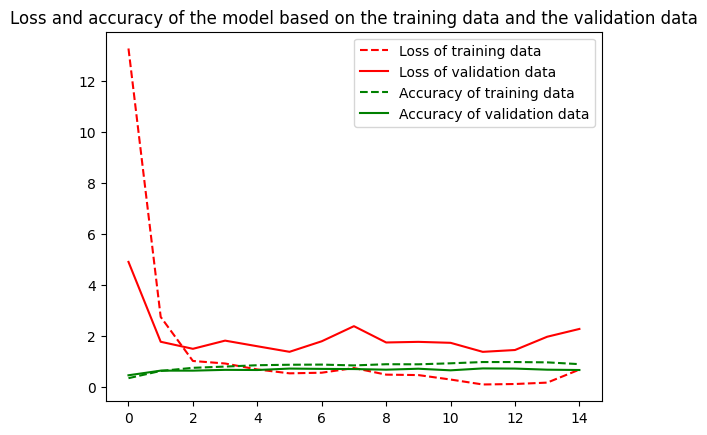

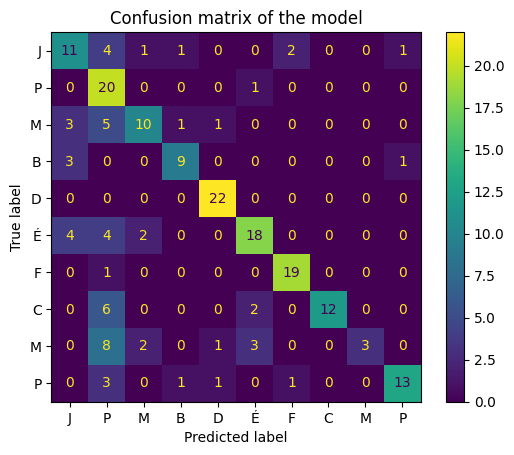

Image n°147 of class 9 => Category [Plats]
Model prediction : Class = 1 => Category [Plage] | Accuracy = 87.53%

Image n°68 of class 5 => Category [Éléphants]
Model prediction : Class = 5 => Category [Éléphants] | Accuracy = 82.13%

Image n°0 of class 5 => Category [Éléphants]
Model prediction : Class = 5 => Category [Éléphants] | Accuracy = 100.0%

Image n°2 of class 4 => Category [Dinosaures]
Model prediction : Class = 4 => Category [Dinosaures] | Accuracy = 100.0%

Image n°176 of class 1 => Category [Plage]
Model prediction : Class = 1 => Category [Plage] | Accuracy = 100.0%



In [122]:
display_loss_accuracy()
display_confusion_matrix()

test_image_classification()

**Faites progresser les résultats avec une procédure de Data Augmentation.**

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.data import Dataset

data_augmentation = Sequential()

data_augmentation.add(RandomFlip("horizontal"))
data_augmentation.add(RandomRotation(0.1))

dataset = Dataset.from_tensor_slices((X_train, Y_train))
dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

# Building the sequential model and implementing Data augmentation
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(
    32, (5, 5),
    activation = 'relu',
    padding = 'same',
    input_shape = dim_img
))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(
    64, (3, 3),
    activation = 'relu',
    padding = 'same',
    input_shape = dim_img
))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history = model.fit(
    X_train, Y_train,
    epochs = 30,
    batch_size = 32,
    validation_split = 0.2,
    verbose = 0
)

Y_predict = model.predict(X_test, verbose = 0)

In [ ]:
display_loss_accuracy()
display_confusion_matrix()

test_image_classification()